In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [2]:
calendar=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\PP\HeroVIRED Capstone\calendar.csv")

In [3]:
calendar

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125
...,...,...,...,...,...,...,...,...
319187,319188,52729945,2022-07-06 00:00:00.000000,1,64.0,64.0,1,10
319188,319189,36953202,2022-07-08 00:00:00.000000,0,140.0,140.0,3,1125
319189,319190,39580214,2022-06-13 00:00:00.000000,1,49.0,49.0,1,13
319190,319191,49016014,2022-10-26 00:00:00.000000,0,60.0,60.0,2,30


In [4]:
calendar['Booking_date']=calendar['date']
calendar

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Booking_date
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5,2022-08-03 00:00:00.000000
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99,2022-11-13 00:00:00.000000
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125,2022-04-17 00:00:00.000000
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000,2022-01-31 00:00:00.000000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125,2022-05-21 00:00:00.000000
...,...,...,...,...,...,...,...,...,...
319187,319188,52729945,2022-07-06 00:00:00.000000,1,64.0,64.0,1,10,2022-07-06 00:00:00.000000
319188,319189,36953202,2022-07-08 00:00:00.000000,0,140.0,140.0,3,1125,2022-07-08 00:00:00.000000
319189,319190,39580214,2022-06-13 00:00:00.000000,1,49.0,49.0,1,13,2022-06-13 00:00:00.000000
319190,319191,49016014,2022-10-26 00:00:00.000000,0,60.0,60.0,2,30,2022-10-26 00:00:00.000000


In [5]:
calendar=calendar.drop(calendar[['date']],axis=1)
calendar

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,Booking_date
0,1,40334325,0,56.0,56.0,3,5,2022-08-03 00:00:00.000000
1,2,22742449,1,95.0,95.0,2,99,2022-11-13 00:00:00.000000
2,3,34621717,0,75.0,75.0,2,1125,2022-04-17 00:00:00.000000
3,4,38281744,1,150.0,150.0,1,1000,2022-01-31 00:00:00.000000
4,5,18835003,0,100.0,100.0,2,1125,2022-05-21 00:00:00.000000
...,...,...,...,...,...,...,...,...
319187,319188,52729945,1,64.0,64.0,1,10,2022-07-06 00:00:00.000000
319188,319189,36953202,0,140.0,140.0,3,1125,2022-07-08 00:00:00.000000
319189,319190,39580214,1,49.0,49.0,1,13,2022-06-13 00:00:00.000000
319190,319191,49016014,0,60.0,60.0,2,30,2022-10-26 00:00:00.000000


In [6]:
calendar[['Booking date', 'Time_stamp']] = calendar['Booking_date'].str.split(' ', expand=True)
calendar[['Booking date', 'Time_stamp']]

,Booking date,Time_stamp
0,2022-08-03,00:00:00.000000
1,2022-11-13,00:00:00.000000
2,2022-04-17,00:00:00.000000
3,2022-01-31,00:00:00.000000
4,2022-05-21,00:00:00.000000
...,...,...
319187,2022-07-06,00:00:00.000000
319188,2022-07-08,00:00:00.000000
319189,2022-06-13,00:00:00.000000
319190,2022-10-26,00:00:00.000000


In [7]:
calendar

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,Booking_date,Booking date,Time_stamp
0,1,40334325,0,56.0,56.0,3,5,2022-08-03 00:00:00.000000,2022-08-03,00:00:00.000000
1,2,22742449,1,95.0,95.0,2,99,2022-11-13 00:00:00.000000,2022-11-13,00:00:00.000000
2,3,34621717,0,75.0,75.0,2,1125,2022-04-17 00:00:00.000000,2022-04-17,00:00:00.000000
3,4,38281744,1,150.0,150.0,1,1000,2022-01-31 00:00:00.000000,2022-01-31,00:00:00.000000
4,5,18835003,0,100.0,100.0,2,1125,2022-05-21 00:00:00.000000,2022-05-21,00:00:00.000000
...,...,...,...,...,...,...,...,...,...,...
319187,319188,52729945,1,64.0,64.0,1,10,2022-07-06 00:00:00.000000,2022-07-06,00:00:00.000000
319188,319189,36953202,0,140.0,140.0,3,1125,2022-07-08 00:00:00.000000,2022-07-08,00:00:00.000000
319189,319190,39580214,1,49.0,49.0,1,13,2022-06-13 00:00:00.000000,2022-06-13,00:00:00.000000
319190,319191,49016014,0,60.0,60.0,2,30,2022-10-26 00:00:00.000000,2022-10-26,00:00:00.000000


In [8]:
calendar['Time_stamp'].unique()

array(['00:00:00.000000'], dtype=object)

As there are no important data in Timestamp, dropping Time_stamp and booking_date column

In [9]:
calendar=calendar.drop(calendar[["Time_stamp","Booking_date"]],axis=1)
calendar

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,Booking date
0,1,40334325,0,56.0,56.0,3,5,2022-08-03
1,2,22742449,1,95.0,95.0,2,99,2022-11-13
2,3,34621717,0,75.0,75.0,2,1125,2022-04-17
3,4,38281744,1,150.0,150.0,1,1000,2022-01-31
4,5,18835003,0,100.0,100.0,2,1125,2022-05-21
...,...,...,...,...,...,...,...,...
319187,319188,52729945,1,64.0,64.0,1,10,2022-07-06
319188,319189,36953202,0,140.0,140.0,3,1125,2022-07-08
319189,319190,39580214,1,49.0,49.0,1,13,2022-06-13
319190,319191,49016014,0,60.0,60.0,2,30,2022-10-26


#### Now checking the calendar data and finding anomalies in it.

##### 1. Checking for the null Values.

In [10]:
calendar.isna().sum()

calender_id        0
listing_id         0
available          0
price             75
adjusted_price    75
minimum_nights     0
maximum_nights     0
Booking date       0
dtype: int64

##### As there are 75 data points are empty we need to to impute the data, will use .describe() functions for the two columns and we will check for outliers using box plot

In [11]:
calendar[["price","adjusted_price"]].describe()

,price,adjusted_price
count,319117.000000,319117.000000
mean,109.917779,109.712131
std,185.791168,185.551851
min,13.000000,13.000000
25%,59.000000,58.000000
50%,79.000000,79.000000
75%,115.000000,115.000000
max,5800.000000,5800.000000


AS the standard deviation is more than the mean this indicates high variation between values, and abnormal distribution for data.

###### Checking with boxplot and imputing data 

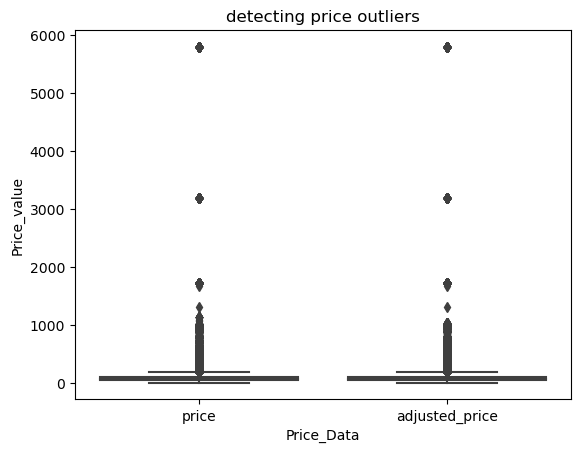

In [12]:
sns.boxplot(data=calendar[['price',"adjusted_price"]])
plt.ylabel('Price_value')
plt.xlabel('Price_Data')
plt.title('detecting price outliers')
plt.show()

As the data have many outliers we need to impute the data using median of the data in price and adjusted price columns

In [13]:
calendar[['price',"adjusted_price"]].median()

price             79.0
adjusted_price    79.0
dtype: float64

In [14]:
calendar['price'].fillna(calendar['price'].median(),inplace=True)

In [15]:
calendar['adjusted_price'].fillna(calendar['adjusted_price'].median(),inplace=True)

Now removing the outliers from price and adjusted price column

In [16]:
Q1 =calendar['price'].quantile(0.25)
Q3 = calendar['price'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers = calendar[(calendar['price'] < Q1 - threshold * IQR) | (calendar['price'] > Q3 + threshold * IQR)]

In [17]:
calendar = calendar.drop(outliers.index)
calendar

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,Booking date
0,1,40334325,0,56.0,56.0,3,5,2022-08-03
1,2,22742449,1,95.0,95.0,2,99,2022-11-13
2,3,34621717,0,75.0,75.0,2,1125,2022-04-17
3,4,38281744,1,150.0,150.0,1,1000,2022-01-31
4,5,18835003,0,100.0,100.0,2,1125,2022-05-21
...,...,...,...,...,...,...,...,...
319187,319188,52729945,1,64.0,64.0,1,10,2022-07-06
319188,319189,36953202,0,140.0,140.0,3,1125,2022-07-08
319189,319190,39580214,1,49.0,49.0,1,13,2022-06-13
319190,319191,49016014,0,60.0,60.0,2,30,2022-10-26


Now plotting box plot and histogram plot for checking the outliers

<Axes: >

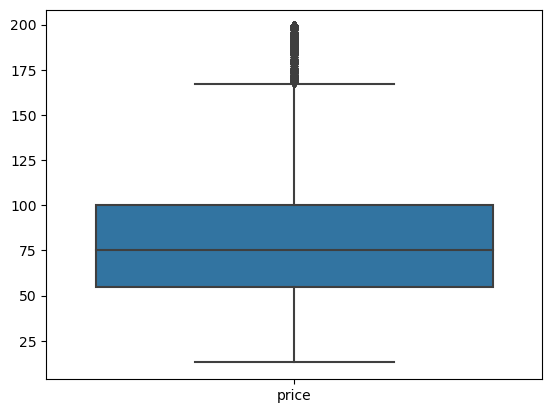

In [18]:
sns.boxplot(data=calendar[['price']])

<Axes: xlabel='price', ylabel='Count'>

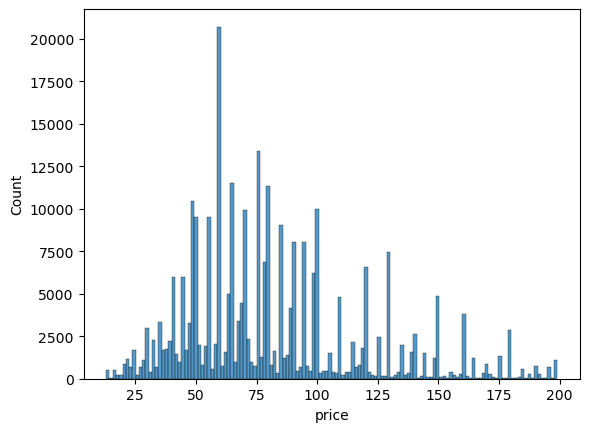

In [19]:
sns.histplot(data=calendar['price'])

checking the null values

In [20]:
calendar.isna().sum()

calender_id       0
listing_id        0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
Booking date      0
dtype: int64

Now checking for duplicates in the data

In [21]:
duplicate_values=calendar[calendar.duplicated()]
duplicate_values

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,Booking date


As we can see there are no duplicates, can proceed further to another dataset

In [22]:
Hosts=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\PP\HeroVIRED Capstone\hosts.csv")
Hosts

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...
...,...,...,...,...,...
1106,434049804,Mathias,2021-11-30 00:00:00.000000,BE,NaN
1107,435722877,Tatjana,2021-12-12 00:00:00.000000,BE,NaN
1108,435999398,Flor,2021-12-14 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
1109,436739371,Naser,2021-12-20 00:00:00.000000,BE,NaN


Now seperating the date from host_since columns

In [23]:
Hosts['host_since']

0       2010-09-14 00:00:00.000000
1       2011-01-04 00:00:00.000000
2       2011-02-27 00:00:00.000000
3       2011-03-20 00:00:00.000000
4       2011-03-25 00:00:00.000000
                   ...            
1106    2021-11-30 00:00:00.000000
1107    2021-12-12 00:00:00.000000
1108    2021-12-14 00:00:00.000000
1109    2021-12-20 00:00:00.000000
1110    2021-12-24 00:00:00.000000
Name: host_since, Length: 1111, dtype: object

In [24]:
Hosts[['host_since_date', 'host_since_Time_stamp']] = Hosts['host_since'].str.split(' ', expand=True)
Hosts[['host_since_date', 'host_since_Time_stamp']]

,host_since_date,host_since_Time_stamp
0,2010-09-14,00:00:00.000000
1,2011-01-04,00:00:00.000000
2,2011-02-27,00:00:00.000000
3,2011-03-20,00:00:00.000000
4,2011-03-25,00:00:00.000000
...,...,...
1106,2021-11-30,00:00:00.000000
1107,2021-12-12,00:00:00.000000
1108,2021-12-14,00:00:00.000000
1109,2021-12-20,00:00:00.000000


Now removing the host_since and host_since_Time_stamp columns afrer checking unique values in timestamp

In [25]:
Hosts['host_since_Time_stamp'].unique()

array(['00:00:00.000000'], dtype=object)

###### No unique values in time_stamp

In [26]:
Hosts=Hosts.drop(["host_since_Time_stamp","host_since"],axis=1)
Hosts

,host_id,host_name,host_location,host_about,host_since_date
0,234077,Karin,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2010-09-14
1,334804,Ann,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo...",2011-01-04
2,413052,Valérie,"Antwerp, Flanders, Belgium",NaN,2011-02-27
3,452791,Tatiana,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...,2011-03-20
4,462975,Els,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...,2011-03-25
...,...,...,...,...,...
1106,434049804,Mathias,BE,NaN,2021-11-30
1107,435722877,Tatjana,BE,NaN,2021-12-12
1108,435999398,Flor,"Antwerp, Flanders, Belgium",NaN,2021-12-14
1109,436739371,Naser,BE,NaN,2021-12-20


checking for null and duplicate values in the dataset

In [27]:
Hosts.isna().sum()

host_id              0
host_name            0
host_location        3
host_about         621
host_since_date      0
dtype: int64

As host_about is not necsary for analysis, dropping the same column

In [28]:
Hosts=Hosts.drop(['host_about'],axis=1)

In [29]:
Hosts['host_location'].mode()

0    Antwerp, Flanders, Belgium
Name: host_location, dtype: object

Imputing the null values with mode

In [30]:
Hosts['host_location'].fillna(Hosts['host_location'].mode()[0],inplace=True)

In [31]:
Hosts.isna().sum()

host_id            0
host_name          0
host_location      0
host_since_date    0
dtype: int64

Checking for Duplicate Values

In [32]:
Hosts[Hosts.duplicated()]

,host_id,host_name,host_location,host_since_date


As there are no duplicate values we cam move to another dataset

In [33]:
listings=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\PP\HeroVIRED Capstone\listings.csv")
listings.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


In [34]:
listings

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,53916524,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,Industrial loft (110m²) with a relaxing urban ...,51.231330,4.403520,Entire loft,Entire home/apt,2,1.5 baths,1.0,1.0,"[""Refrigerator"", ""Elevator"", ""Yamaha RX-A550 s...",46300712
1745,53928545,https://www.airbnb.com/rooms/53928545,Studio in het midden van Antwerpen,Recent gerenoveerde rustige studio van circa 2...,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Hot water"", ""Long term stays allowed"", ""Kitc...",74268936
1746,53929354,https://www.airbnb.com/rooms/53929354,Mooi appartement met open haard,Vanuit deze ideaal gelegen accommodatie kun je...,51.200340,4.421060,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Kitchen"", ""Smoke alarm"", ""Outdoor furniture""...",334036639
1747,53949105,https://www.airbnb.com/rooms/53949105,Kasteel Boterlaerhof vlakbij Antwerpen,"Kasteel Boterlaerhof ligt ideaal gelegen, op 1...",51.212320,4.482230,Castle,Entire home/apt,16,7.5 baths,7.0,33.0,"[""Refrigerator"", ""Private garden or backyard"",...",377595714


###### Checking for null values and dropping unnecessary columns in the dataset

In [35]:
listings.isna().sum()

listing_id          0
listing_url         0
name                0
description        70
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms          128
beds               41
amenities           0
host_id             0
dtype: int64

In [36]:
listings[["description","name","listing_url"]]

,description,name,listing_url
0,Decorated in a vintage style combined with a f...,aplace/antwerp: cosy suite - fashion district,https://www.airbnb.com/rooms/50904
1,Enjoy your stay at our 4 person apartment in t...,Spacious apartment nearby Mas,https://www.airbnb.com/rooms/116134
2,Do you enjoy authentic places with a lot of ch...,Apartment with terrace in trendy Zurenborg,https://www.airbnb.com/rooms/218916
3,"Large bedroom in classic 1930s house. Kitchen,...",Large stylish room in 1930s house + garden,https://www.airbnb.com/rooms/224333
4,"<b>The space</b><br />Apartment ""Roscam"" is a ...",APARTMENT ROSCAM - OLD CENTRE ANTWERP,https://www.airbnb.com/rooms/224682
...,...,...,...
1744,Industrial loft (110m²) with a relaxing urban ...,Industrial spacious loft in Antwerp!,https://www.airbnb.com/rooms/53916524
1745,Recent gerenoveerde rustige studio van circa 2...,Studio in het midden van Antwerpen,https://www.airbnb.com/rooms/53928545
1746,Vanuit deze ideaal gelegen accommodatie kun je...,Mooi appartement met open haard,https://www.airbnb.com/rooms/53929354
1747,"Kasteel Boterlaerhof ligt ideaal gelegen, op 1...",Kasteel Boterlaerhof vlakbij Antwerpen,https://www.airbnb.com/rooms/53949105


Dropping the above columns as they are not necessary for data analysis

In [37]:
listings=listings.drop(listings[["description","name","listing_url"]],axis=1)
listings

,listing_id,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933
...,...,...,...,...,...,...,...,...,...,...,...
1744,53916524,51.231330,4.403520,Entire loft,Entire home/apt,2,1.5 baths,1.0,1.0,"[""Refrigerator"", ""Elevator"", ""Yamaha RX-A550 s...",46300712
1745,53928545,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Hot water"", ""Long term stays allowed"", ""Kitc...",74268936
1746,53929354,51.200340,4.421060,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Kitchen"", ""Smoke alarm"", ""Outdoor furniture""...",334036639
1747,53949105,51.212320,4.482230,Castle,Entire home/apt,16,7.5 baths,7.0,33.0,"[""Refrigerator"", ""Private garden or backyard"",...",377595714


In [38]:
listings.isna().sum()

listing_id          0
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms          128
beds               41
amenities           0
host_id             0
dtype: int64

In [39]:
listings[["bedrooms","beds"]].describe()

,bedrooms,beds
count,1621.000000,1708.000000
mean,1.529303,2.220726
std,1.091453,2.227509
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,3.000000
max,20.000000,44.000000


<Axes: >

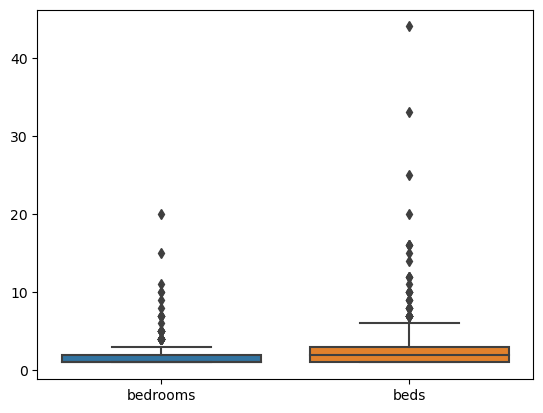

In [40]:
sns.boxplot(data=listings[["bedrooms","beds"]])

In [41]:
listings[["bedrooms","beds"]].median()

bedrooms    1.0
beds        2.0
dtype: float64

As there are many outliers, imputing the null values in data with median. 

In [42]:
listings['bedrooms'].fillna(listings['bedrooms'].median(),inplace=True)
listings['beds'].fillna(listings['beds'].median(),inplace=True)

In [43]:
listings.isna().sum()

listing_id        0
latitude          0
longitude         0
property_type     0
room_type         0
accomodates       0
bathrooms_text    0
bedrooms          0
beds              0
amenities         0
host_id           0
dtype: int64

In [44]:
listings.dtypes

listing_id          int64
latitude          float64
longitude         float64
property_type      object
room_type          object
accomodates         int64
bathrooms_text     object
bedrooms          float64
beds              float64
amenities          object
host_id             int64
dtype: object

Now handling the bathroom_text column

In [45]:
listings['bathrooms_text']

0       1 private bath
1            2.5 baths
2               1 bath
3       2 shared baths
4               1 bath
             ...      
1744         1.5 baths
1745            1 bath
1746            1 bath
1747         7.5 baths
1748         1.5 baths
Name: bathrooms_text, Length: 1749, dtype: object

In [46]:
listings[['Number_of_bathrooms',"Type_of_Bathrooms","Bath"]]= listings['bathrooms_text'].str.split(' ', expand=True)
listings[['Number_of_bathrooms',"Type_of_Bathrooms","Bath"]]

,Number_of_bathrooms,Type_of_Bathrooms,Bath
0,1,private,bath
1,2.5,baths,None
2,1,bath,None
3,2,shared,baths
4,1,bath,None
...,...,...,...
1744,1.5,baths,None
1745,1,bath,None
1746,1,bath,None
1747,7.5,baths,None


Dropping the type of bathroom and bath columns

In [47]:
listings=listings.drop(listings[["Type_of_Bathrooms","Bath",'bathrooms_text']],axis=1)
listings

,listing_id,latitude,longitude,property_type,room_type,accomodates,bedrooms,beds,amenities,host_id,Number_of_bathrooms
0,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,1
1,116134,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,2.5
2,218916,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664,1
3,224333,51.197720,4.458530,Private room in residential home,Private room,2,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377,2
4,224682,51.217220,4.397900,Entire rental unit,Entire home/apt,3,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933,1
...,...,...,...,...,...,...,...,...,...,...,...
1744,53916524,51.231330,4.403520,Entire loft,Entire home/apt,2,1.0,1.0,"[""Refrigerator"", ""Elevator"", ""Yamaha RX-A550 s...",46300712,1.5
1745,53928545,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Hot water"", ""Long term stays allowed"", ""Kitc...",74268936,1
1746,53929354,51.200340,4.421060,Entire rental unit,Entire home/apt,4,1.0,2.0,"[""Kitchen"", ""Smoke alarm"", ""Outdoor furniture""...",334036639,1
1747,53949105,51.212320,4.482230,Castle,Entire home/apt,16,7.0,33.0,"[""Refrigerator"", ""Private garden or backyard"",...",377595714,7.5


In the number of bathroom secimal values are present, changing it to whole number by using floor function

In [48]:
listings['Number_of_bathrooms'].unique()

array(['1', '2.5', '2', '1.5', 'Shared', '3', '3.5', '8.5', '0',
       'Half-bath', 'Private', '5', '4', '6.5', '15.5', '8', '6', '7.5'],
      dtype=object)

As observed from the data set there are string values present so replacing half-bath,shared-bath and private bath to 1

In [49]:
listings['Number_of_bathrooms'].replace(['Half-bath', 'Private','Shared'], 0, inplace=True)

In [50]:
listings['Number_of_bathrooms']=listings['Number_of_bathrooms'].astype(float)

<Axes: xlabel='Number_of_bathrooms', ylabel='Count'>

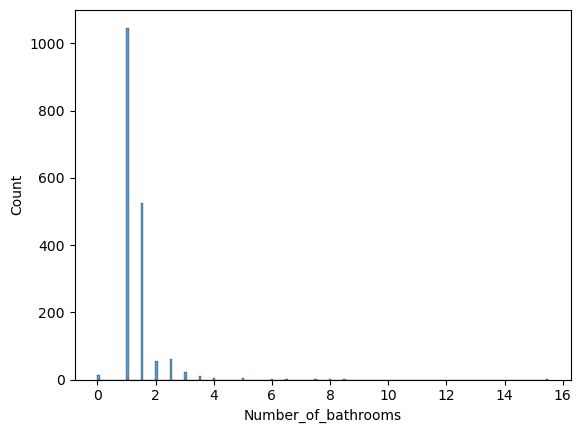

In [51]:
sns.histplot(data=listings['Number_of_bathrooms'])

<Axes: >

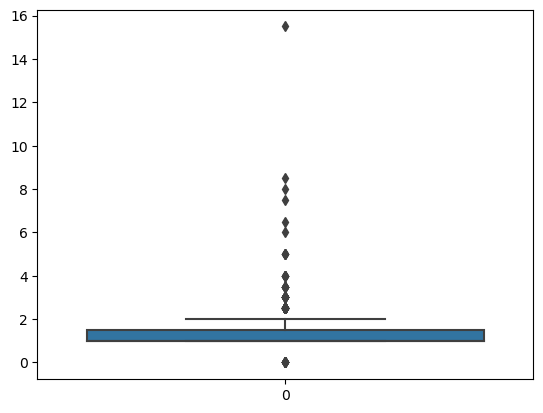

In [52]:
sns.boxplot(data=listings['Number_of_bathrooms'])

As observed the data is skewed and have many outliers replacing '0' values with median value

In [53]:
listings['Number_of_bathrooms'].median()

1.0

As median=1 is observed, replacing 0 with 1

In [54]:
listings['Number_of_bathrooms'].replace([0], 1, inplace=True)

In [55]:
listings['Number_of_bathrooms'].unique()

array([ 1. ,  2.5,  2. ,  1.5,  3. ,  3.5,  8.5,  5. ,  4. ,  6.5, 15.5,
        8. ,  6. ,  7.5])

applying floor function to the decimal values 

In [56]:
listings['Number_of_bathrooms']=listings['Number_of_bathrooms'].apply(np.floor)
listings['Number_of_bathrooms']

0       1.0
1       2.0
2       1.0
3       2.0
4       1.0
       ... 
1744    1.0
1745    1.0
1746    1.0
1747    7.0
1748    1.0
Name: Number_of_bathrooms, Length: 1749, dtype: float64

In [57]:
listings['Number_of_bathrooms'].unique()

array([ 1.,  2.,  3.,  8.,  5.,  4.,  6., 15.,  7.])

Now handling the amenities column

In [58]:
listings['amenities']

0       ["Kitchen", "Smoke alarm", "Hair dryer", "Keyp...
1       ["Refrigerator", "Elevator", "Paid street park...
2       ["Paid street parking off premises", "Kitchen"...
3       ["Fire extinguisher", "Backyard", "Long term s...
4       ["Refrigerator", "Kitchen", "Smoke alarm", "Sh...
                              ...                        
1744    ["Refrigerator", "Elevator", "Yamaha RX-A550 s...
1745    ["Hot water", "Long term stays allowed", "Kitc...
1746    ["Kitchen", "Smoke alarm", "Outdoor furniture"...
1747    ["Refrigerator", "Private garden or backyard",...
1748    ["Kitchen", "Voice command Google  Bluetooth s...
Name: amenities, Length: 1749, dtype: object

In [59]:
def count_elements(lst):
    return len(lst)

listings['amenities_element_count'] = listings['amenities'].apply(count_elements)

print(listings[['amenities_element_count','amenities']])

      amenities_element_count  \
0                         591   
1                         823   
2                         784   
3                         197   
4                         328   
...                       ...   
1744                      715   
1745                      158   
1746                      450   
1747                      609   
1748                      678   

                                              amenities  
0     ["Kitchen", "Smoke alarm", "Hair dryer", "Keyp...  
1     ["Refrigerator", "Elevator", "Paid street park...  
2     ["Paid street parking off premises", "Kitchen"...  
3     ["Fire extinguisher", "Backyard", "Long term s...  
4     ["Refrigerator", "Kitchen", "Smoke alarm", "Sh...  
...                                                 ...  
1744  ["Refrigerator", "Elevator", "Yamaha RX-A550 s...  
1745  ["Hot water", "Long term stays allowed", "Kitc...  
1746  ["Kitchen", "Smoke alarm", "Outdoor furniture"...  
1747  ["Refrigerator", 

In [60]:
listings

,listing_id,latitude,longitude,property_type,room_type,accomodates,bedrooms,beds,amenities,host_id,Number_of_bathrooms,amenities_element_count
0,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,1.0,591
1,116134,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,2.0,823
2,218916,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664,1.0,784
3,224333,51.197720,4.458530,Private room in residential home,Private room,2,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377,2.0,197
4,224682,51.217220,4.397900,Entire rental unit,Entire home/apt,3,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933,1.0,328
...,...,...,...,...,...,...,...,...,...,...,...,...
1744,53916524,51.231330,4.403520,Entire loft,Entire home/apt,2,1.0,1.0,"[""Refrigerator"", ""Elevator"", ""Yamaha RX-A550 s...",46300712,1.0,715
1745,53928545,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Hot water"", ""Long term stays allowed"", ""Kitc...",74268936,1.0,158
1746,53929354,51.200340,4.421060,Entire rental unit,Entire home/apt,4,1.0,2.0,"[""Kitchen"", ""Smoke alarm"", ""Outdoor furniture""...",334036639,1.0,450
1747,53949105,51.212320,4.482230,Castle,Entire home/apt,16,7.0,33.0,"[""Refrigerator"", ""Private garden or backyard"",...",377595714,7.0,609


In [61]:
listings.dtypes

listing_id                   int64
latitude                   float64
longitude                  float64
property_type               object
room_type                   object
accomodates                  int64
bedrooms                   float64
beds                       float64
amenities                   object
host_id                      int64
Number_of_bathrooms        float64
amenities_element_count      int64
dtype: object

In [62]:
listings.isna().sum()

listing_id                 0
latitude                   0
longitude                  0
property_type              0
room_type                  0
accomodates                0
bedrooms                   0
beds                       0
amenities                  0
host_id                    0
Number_of_bathrooms        0
amenities_element_count    0
dtype: int64

AS There are no null values, moving towards next data

In [63]:
reviews=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\PP\HeroVIRED Capstone\reviews.csv")
reviews

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...
...,...,...,...,...,...,...
62982,62983,53538847,2021-12-05 00:00:00.000000,48076753,Serge,The place as it's shown in the photos. Great l...
62983,62984,53600839,2021-12-12 00:00:00.000000,6635741,Dániel,The spacious apartment is idyllically located ...
62984,62985,53819793,2021-12-21 00:00:00.000000,247934155,Gijs,It was great
62985,62986,53825194,2021-12-19 00:00:00.000000,361042882,Siarhei,Flor es muy atenta y me ayudo mucho entrando a...


In [64]:
reviews["review_date"]=reviews["date"]
reviews

,review_id,listing_id,date,reviewer_id,reviewer_name,comments,review_date
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...,2015-05-06 00:00:00.000000
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help...",2021-10-10 00:00:00.000000
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,...",2012-03-05 00:00:00.000000
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar...",2012-05-25 00:00:00.000000
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...,2013-09-03 00:00:00.000000
...,...,...,...,...,...,...,...
62982,62983,53538847,2021-12-05 00:00:00.000000,48076753,Serge,The place as it's shown in the photos. Great l...,2021-12-05 00:00:00.000000
62983,62984,53600839,2021-12-12 00:00:00.000000,6635741,Dániel,The spacious apartment is idyllically located ...,2021-12-12 00:00:00.000000
62984,62985,53819793,2021-12-21 00:00:00.000000,247934155,Gijs,It was great,2021-12-21 00:00:00.000000
62985,62986,53825194,2021-12-19 00:00:00.000000,361042882,Siarhei,Flor es muy atenta y me ayudo mucho entrando a...,2021-12-19 00:00:00.000000


In [65]:
reviews=reviews.drop(["date"],axis=1)
reviews

,review_id,listing_id,reviewer_id,reviewer_name,comments,review_date
0,1,50904,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...,2015-05-06 00:00:00.000000
1,2,50904,333559,Emilie,"Karin is a wonderful host, she was really help...",2021-10-10 00:00:00.000000
2,3,116134,928644,Aurélien,"Amazing flat, really close from the MAS Musem,...",2012-03-05 00:00:00.000000
3,4,116134,231288,Gail,"This is a well equipped, very comfortable apar...",2012-05-25 00:00:00.000000
4,5,116134,7984251,Marcel,This is a very nice appartement. We really lik...,2013-09-03 00:00:00.000000
...,...,...,...,...,...,...
62982,62983,53538847,48076753,Serge,The place as it's shown in the photos. Great l...,2021-12-05 00:00:00.000000
62983,62984,53600839,6635741,Dániel,The spacious apartment is idyllically located ...,2021-12-12 00:00:00.000000
62984,62985,53819793,247934155,Gijs,It was great,2021-12-21 00:00:00.000000
62985,62986,53825194,361042882,Siarhei,Flor es muy atenta y me ayudo mucho entrando a...,2021-12-19 00:00:00.000000


Now checking for null values, duplicates and removing unecessary cloumns

In [66]:
reviews=reviews.drop(["comments"],axis=1)
reviews

,review_id,listing_id,reviewer_id,reviewer_name,review_date
0,1,50904,19482395,Jihae,2015-05-06 00:00:00.000000
1,2,50904,333559,Emilie,2021-10-10 00:00:00.000000
2,3,116134,928644,Aurélien,2012-03-05 00:00:00.000000
3,4,116134,231288,Gail,2012-05-25 00:00:00.000000
4,5,116134,7984251,Marcel,2013-09-03 00:00:00.000000
...,...,...,...,...,...
62982,62983,53538847,48076753,Serge,2021-12-05 00:00:00.000000
62983,62984,53600839,6635741,Dániel,2021-12-12 00:00:00.000000
62984,62985,53819793,247934155,Gijs,2021-12-21 00:00:00.000000
62985,62986,53825194,361042882,Siarhei,2021-12-19 00:00:00.000000


In [67]:
reviews[['Review_date','Time_stamp']]=reviews['review_date'].str.split(' ', expand=True)
reviews

,review_id,listing_id,reviewer_id,reviewer_name,review_date,Review_date,Time_stamp
0,1,50904,19482395,Jihae,2015-05-06 00:00:00.000000,2015-05-06,00:00:00.000000
1,2,50904,333559,Emilie,2021-10-10 00:00:00.000000,2021-10-10,00:00:00.000000
2,3,116134,928644,Aurélien,2012-03-05 00:00:00.000000,2012-03-05,00:00:00.000000
3,4,116134,231288,Gail,2012-05-25 00:00:00.000000,2012-05-25,00:00:00.000000
4,5,116134,7984251,Marcel,2013-09-03 00:00:00.000000,2013-09-03,00:00:00.000000
...,...,...,...,...,...,...,...
62982,62983,53538847,48076753,Serge,2021-12-05 00:00:00.000000,2021-12-05,00:00:00.000000
62983,62984,53600839,6635741,Dániel,2021-12-12 00:00:00.000000,2021-12-12,00:00:00.000000
62984,62985,53819793,247934155,Gijs,2021-12-21 00:00:00.000000,2021-12-21,00:00:00.000000
62985,62986,53825194,361042882,Siarhei,2021-12-19 00:00:00.000000,2021-12-19,00:00:00.000000


In [68]:
reviews['Time_stamp'].unique()

array(['00:00:00.000000'], dtype=object)

In [69]:
reviews=reviews.drop(reviews[['Time_stamp','review_date']],axis=1)
reviews

,review_id,listing_id,reviewer_id,reviewer_name,Review_date
0,1,50904,19482395,Jihae,2015-05-06
1,2,50904,333559,Emilie,2021-10-10
2,3,116134,928644,Aurélien,2012-03-05
3,4,116134,231288,Gail,2012-05-25
4,5,116134,7984251,Marcel,2013-09-03
...,...,...,...,...,...
62982,62983,53538847,48076753,Serge,2021-12-05
62983,62984,53600839,6635741,Dániel,2021-12-12
62984,62985,53819793,247934155,Gijs,2021-12-21
62985,62986,53825194,361042882,Siarhei,2021-12-19


Checking for null Values

In [70]:
reviews.isna().sum()

review_id        0
listing_id       0
reviewer_id      0
reviewer_name    0
Review_date      0
dtype: int64

In [71]:
reviews[reviews.duplicated()]

,review_id,listing_id,reviewer_id,reviewer_name,Review_date


as there are no duplicate values,now joining the datasets based on common columns

In [72]:
print(calendar.columns)
print()
print(Hosts.columns)
print()
print(listings.columns)
print()
print(reviews.columns)

Index(['calender_id', 'listing_id', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights', 'Booking date'],
      dtype='object')

Index(['host_id', 'host_name', 'host_location', 'host_since_date'], dtype='object')

Index(['listing_id', 'latitude', 'longitude', 'property_type', 'room_type',
       'accomodates', 'bedrooms', 'beds', 'amenities', 'host_id',
       'Number_of_bathrooms', 'amenities_element_count'],
      dtype='object')

Index(['review_id', 'listing_id', 'reviewer_id', 'reviewer_name',
       'Review_date'],
      dtype='object')


In [73]:
merge1=pd.merge(calendar, listings, on='listing_id', how='inner')
merge1

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,Booking date,latitude,longitude,property_type,room_type,accomodates,bedrooms,beds,amenities,host_id,Number_of_bathrooms,amenities_element_count
0,1,40334325,0,56.0,56.0,3,5,2022-08-03,51.209890,4.422980,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266
1,2109,40334325,1,56.0,56.0,3,5,2022-02-14,51.209890,4.422980,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266
2,3617,40334325,0,56.0,56.0,3,5,2022-04-26,51.209890,4.422980,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266
3,5560,40334325,0,56.0,56.0,3,5,2022-04-08,51.209890,4.422980,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266
4,8188,40334325,0,56.0,56.0,3,5,2022-04-11,51.209890,4.422980,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292267,309825,36031281,1,144.0,144.0,2,1125,2022-01-17,51.214190,4.400130,Entire serviced apartment,Entire home/apt,4,2.0,3.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",270964935,1.0,924
292268,129624,813969,0,199.0,199.0,1,1125,2022-01-13,51.213470,4.391250,Entire rental unit,Entire home/apt,6,2.0,3.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",4277604,1.0,825
292269,303431,813969,0,199.0,199.0,1,1125,2022-01-12,51.213470,4.391250,Entire rental unit,Entire home/apt,6,2.0,3.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",4277604,1.0,825
292270,243373,52896982,1,190.0,190.0,1,1000,2022-08-02,51.209221,4.395305,Entire loft,Entire home/apt,4,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Kitchen"", ""Smoke...",428245943,1.0,846


In [74]:
merge2=pd.merge(merge1, Hosts, on='host_id', how='inner')
merge2

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,Booking date,latitude,longitude,...,accomodates,bedrooms,beds,amenities,host_id,Number_of_bathrooms,amenities_element_count,host_name,host_location,host_since_date
0,1,40334325,0,56.0,56.0,3,5,2022-08-03,51.20989,4.42298,...,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266,Xander,BE,2019-11-23
1,2109,40334325,1,56.0,56.0,3,5,2022-02-14,51.20989,4.42298,...,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266,Xander,BE,2019-11-23
2,3617,40334325,0,56.0,56.0,3,5,2022-04-26,51.20989,4.42298,...,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266,Xander,BE,2019-11-23
3,5560,40334325,0,56.0,56.0,3,5,2022-04-08,51.20989,4.42298,...,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266,Xander,BE,2019-11-23
4,8188,40334325,0,56.0,56.0,3,5,2022-04-11,51.20989,4.42298,...,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266,Xander,BE,2019-11-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292267,207771,53107460,0,100.0,150.0,2,365,2022-01-08,51.21674,4.41422,...,4,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Shower gel"", ""Ki...",267848896,1.0,680,Dietrich,BE,2019-06-11
292268,244771,53107460,1,99.0,149.0,2,365,2022-01-02,51.21674,4.41422,...,4,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Shower gel"", ""Ki...",267848896,1.0,680,Dietrich,BE,2019-06-11
292269,307525,53107460,1,150.0,225.0,2,365,2022-01-31,51.21674,4.41422,...,4,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Shower gel"", ""Ki...",267848896,1.0,680,Dietrich,BE,2019-06-11
292270,129624,813969,0,199.0,199.0,1,1125,2022-01-13,51.21347,4.39125,...,6,2.0,3.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",4277604,1.0,825,Sarah,"Antwerp, Flanders, Belgium",2012-11-29


In [75]:
Final_merge=pd.merge( merge2,reviews, on='listing_id', how='inner')
Final_merge

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,Booking date,latitude,longitude,...,host_id,Number_of_bathrooms,amenities_element_count,host_name,host_location,host_since_date,review_id,reviewer_id,reviewer_name,Review_date
0,1,40334325,0,56.0,56.0,3,5,2022-08-03,51.20989,4.42298,...,311556587,1.0,266,Xander,BE,2019-11-23,54013,373857,Fernando,2019-12-24
1,2109,40334325,1,56.0,56.0,3,5,2022-02-14,51.20989,4.42298,...,311556587,1.0,266,Xander,BE,2019-11-23,54013,373857,Fernando,2019-12-24
2,3617,40334325,0,56.0,56.0,3,5,2022-04-26,51.20989,4.42298,...,311556587,1.0,266,Xander,BE,2019-11-23,54013,373857,Fernando,2019-12-24
3,5560,40334325,0,56.0,56.0,3,5,2022-04-08,51.20989,4.42298,...,311556587,1.0,266,Xander,BE,2019-11-23,54013,373857,Fernando,2019-12-24
4,8188,40334325,0,56.0,56.0,3,5,2022-04-11,51.20989,4.42298,...,311556587,1.0,266,Xander,BE,2019-11-23,54013,373857,Fernando,2019-12-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10891245,303431,813969,0,199.0,199.0,1,1125,2022-01-12,51.21347,4.39125,...,4277604,1.0,825,Sarah,"Antwerp, Flanders, Belgium",2012-11-29,1102,87545292,Kelly,2021-10-10
10891246,303431,813969,0,199.0,199.0,1,1125,2022-01-12,51.21347,4.39125,...,4277604,1.0,825,Sarah,"Antwerp, Flanders, Belgium",2012-11-29,1103,9345634,Birthe,2021-10-17
10891247,303431,813969,0,199.0,199.0,1,1125,2022-01-12,51.21347,4.39125,...,4277604,1.0,825,Sarah,"Antwerp, Flanders, Belgium",2012-11-29,1104,112444007,Helge,2021-10-19
10891248,303431,813969,0,199.0,199.0,1,1125,2022-01-12,51.21347,4.39125,...,4277604,1.0,825,Sarah,"Antwerp, Flanders, Belgium",2012-11-29,1105,25230710,Peter,2021-11-04


In [76]:
Final_merge.isna().sum()

calender_id                0
listing_id                 0
available                  0
price                      0
adjusted_price             0
minimum_nights             0
maximum_nights             0
Booking date               0
latitude                   0
longitude                  0
property_type              0
room_type                  0
accomodates                0
bedrooms                   0
beds                       0
amenities                  0
host_id                    0
Number_of_bathrooms        0
amenities_element_count    0
host_name                  0
host_location              0
host_since_date            0
review_id                  0
reviewer_id                0
reviewer_name              0
Review_date                0
dtype: int64

In [77]:
Final_merge.columns

Index(['calender_id', 'listing_id', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights', 'Booking date', 'latitude',
       'longitude', 'property_type', 'room_type', 'accomodates', 'bedrooms',
       'beds', 'amenities', 'host_id', 'Number_of_bathrooms',
       'amenities_element_count', 'host_name', 'host_location',
       'host_since_date', 'review_id', 'reviewer_id', 'reviewer_name',
       'Review_date'],
      dtype='object')

In [78]:
Final_merge.dtypes

calender_id                  int64
listing_id                   int64
available                    int64
price                      float64
adjusted_price             float64
minimum_nights               int64
maximum_nights               int64
Booking date                object
latitude                   float64
longitude                  float64
property_type               object
room_type                   object
accomodates                  int64
bedrooms                   float64
beds                       float64
amenities                   object
host_id                      int64
Number_of_bathrooms        float64
amenities_element_count      int64
host_name                   object
host_location               object
host_since_date             object
review_id                    int64
reviewer_id                  int64
reviewer_name               object
Review_date                 object
dtype: object

In [79]:
Final_merge[['price','adjusted_price','minimum_nights','maximum_nights','accomodates','bedrooms','beds']].describe()

,price,adjusted_price,minimum_nights,maximum_nights,accomodates,bedrooms,beds
count,1.089125e+07,1.089125e+07,1.089125e+07,1.089125e+07,1.089125e+07,1.089125e+07,1.089125e+07
mean,7.711539e+01,7.699129e+01,3.122166e+00,9.821935e+02,3.514867e+00,1.375385e+00,2.080920e+00
std,3.411426e+01,3.401290e+01,7.669574e+00,8.487443e+02,2.307878e+00,8.032077e-01,1.534307e+00
min,1.400000e+01,1.400000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,5.300000e+01,5.300000e+01,1.000000e+00,1.125000e+03,2.000000e+00,1.000000e+00,1.000000e+00
50%,6.900000e+01,6.900000e+01,2.000000e+00,1.125000e+03,3.000000e+00,1.000000e+00,2.000000e+00
75%,9.500000e+01,9.500000e+01,2.000000e+00,1.125000e+03,4.000000e+00,2.000000e+00,3.000000e+00
max,1.990000e+02,2.410000e+02,3.000000e+02,9.999000e+03,1.600000e+01,1.100000e+01,2.000000e+01


In [80]:
Final_merge[['price','adjusted_price','minimum_nights','maximum_nights','accomodates','bedrooms','beds']].quantile([0.25,0.5,0.75,0.9,0.95])

,price,adjusted_price,minimum_nights,maximum_nights,accomodates,bedrooms,beds
0.25,53.0,53.0,1.0,1125.0,2.0,1.0,1.0
0.50,69.0,69.0,2.0,1125.0,3.0,1.0,2.0
0.75,95.0,95.0,2.0,1125.0,4.0,2.0,3.0
0.90,129.0,129.0,3.0,1125.0,6.0,2.0,4.0
0.95,150.0,150.0,7.0,1125.0,8.0,3.0,5.0


Now doing eda of the merged dataset

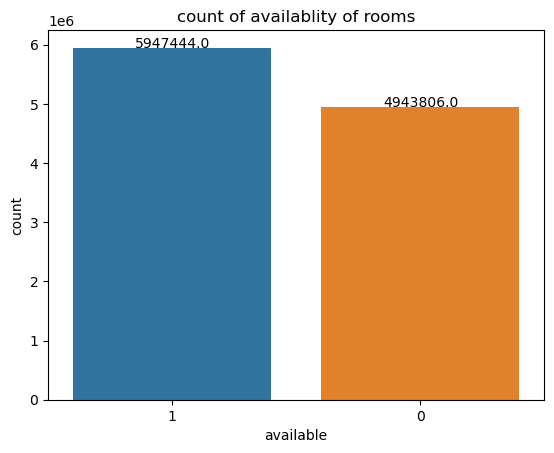

In [81]:
ax2=sns.countplot(x='available',data=Final_merge,order=Final_merge['available'].value_counts().index)
abs_values = Final_merge['available'].value_counts().values
#ax2.bar_label(container=ax2.containers[0], labels=abs_values)
for p in ax2.patches:
    ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('count of availablity of rooms')
plt.show()

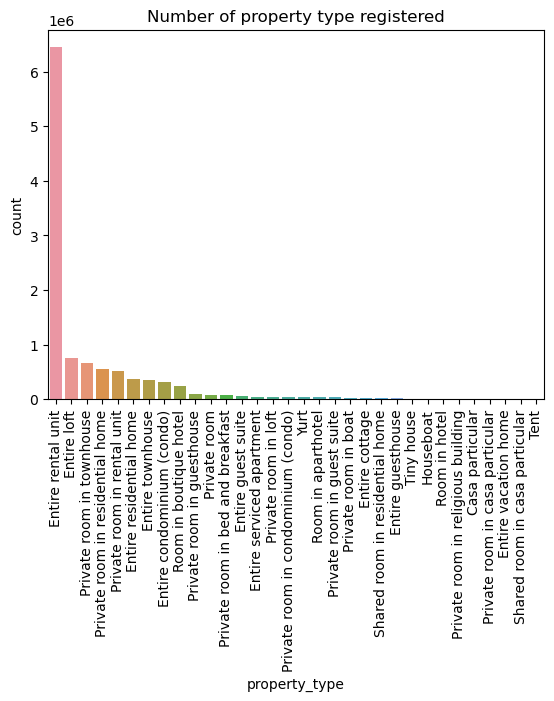

In [82]:
ax1=sns.countplot(x='property_type',data=Final_merge,order=Final_merge['property_type'].value_counts().index)

plt.xticks(rotation=90)
plt.title('Number of property type registered')
plt.show()

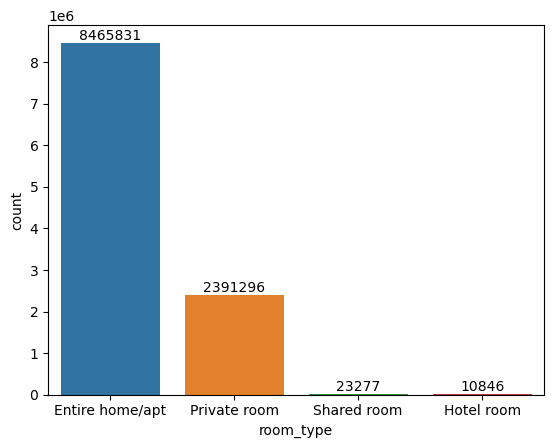

In [83]:
ax=sns.countplot(x='room_type',data=Final_merge,order=Final_merge['room_type'].value_counts(ascending=False).index)

abs_values = Final_merge['room_type'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()


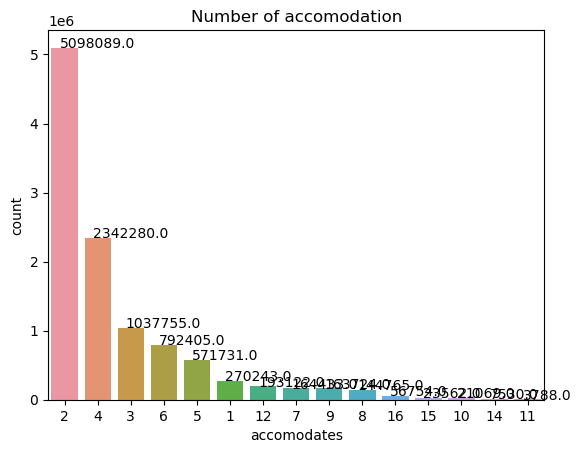

In [84]:
ax3=sns.countplot(x='accomodates',data=Final_merge,order=Final_merge['accomodates'].value_counts().index)
for p in ax3.patches:
    ax3.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Number of accomodation')
plt.show()

## Now doing bivariate analysis of the data

1. checking for correlation between different data points

In [85]:
Final_merge.columns

Index(['calender_id', 'listing_id', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights', 'Booking date', 'latitude',
       'longitude', 'property_type', 'room_type', 'accomodates', 'bedrooms',
       'beds', 'amenities', 'host_id', 'Number_of_bathrooms',
       'amenities_element_count', 'host_name', 'host_location',
       'host_since_date', 'review_id', 'reviewer_id', 'reviewer_name',
       'Review_date'],
      dtype='object')

In [86]:
Final_merge[['available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights', 'accomodates', 'bedrooms',
       'beds', 'Number_of_bathrooms','amenities_element_count']].corr()

,available,price,adjusted_price,minimum_nights,maximum_nights,accomodates,bedrooms,beds,Number_of_bathrooms,amenities_element_count
available,1.000000,0.096361,0.095324,-0.005322,0.033544,0.170691,0.086397,0.144636,0.060646,0.108948
price,0.096361,1.000000,0.999335,0.002387,-0.024852,0.326939,0.361762,0.271871,0.173074,0.248028
adjusted_price,0.095324,0.999335,1.000000,0.003065,-0.025359,0.327138,0.361648,0.272533,0.172211,0.245617
minimum_nights,-0.005322,0.002387,0.003065,1.000000,-0.008673,-0.012208,0.029047,0.026068,-0.045329,0.039045
maximum_nights,0.033544,-0.024852,-0.025359,-0.008673,1.000000,-0.024941,0.048547,0.032747,-0.012093,0.043592
accomodates,0.170691,0.326939,0.327138,-0.012208,-0.024941,1.000000,0.652435,0.833482,0.309542,0.296051
bedrooms,0.086397,0.361762,0.361648,0.029047,0.048547,0.652435,1.000000,0.767315,0.374673,0.149374
beds,0.144636,0.271871,0.272533,0.026068,0.032747,0.833482,0.767315,1.000000,0.321445,0.216734
Number_of_bathrooms,0.060646,0.173074,0.172211,-0.045329,-0.012093,0.309542,0.374673,0.321445,1.000000,0.059973
amenities_element_count,0.108948,0.248028,0.245617,0.039045,0.043592,0.296051,0.149374,0.216734,0.059973,1.000000


As observed from the correlation matrix no strong correlation for price column was observed apart from adjusted price

In [87]:
df = Final_merge

In [88]:
df

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,Booking date,latitude,longitude,...,host_id,Number_of_bathrooms,amenities_element_count,host_name,host_location,host_since_date,review_id,reviewer_id,reviewer_name,Review_date
0,1,40334325,0,56.0,56.0,3,5,2022-08-03,51.20989,4.42298,...,311556587,1.0,266,Xander,BE,2019-11-23,54013,373857,Fernando,2019-12-24
1,2109,40334325,1,56.0,56.0,3,5,2022-02-14,51.20989,4.42298,...,311556587,1.0,266,Xander,BE,2019-11-23,54013,373857,Fernando,2019-12-24
2,3617,40334325,0,56.0,56.0,3,5,2022-04-26,51.20989,4.42298,...,311556587,1.0,266,Xander,BE,2019-11-23,54013,373857,Fernando,2019-12-24
3,5560,40334325,0,56.0,56.0,3,5,2022-04-08,51.20989,4.42298,...,311556587,1.0,266,Xander,BE,2019-11-23,54013,373857,Fernando,2019-12-24
4,8188,40334325,0,56.0,56.0,3,5,2022-04-11,51.20989,4.42298,...,311556587,1.0,266,Xander,BE,2019-11-23,54013,373857,Fernando,2019-12-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10891245,303431,813969,0,199.0,199.0,1,1125,2022-01-12,51.21347,4.39125,...,4277604,1.0,825,Sarah,"Antwerp, Flanders, Belgium",2012-11-29,1102,87545292,Kelly,2021-10-10
10891246,303431,813969,0,199.0,199.0,1,1125,2022-01-12,51.21347,4.39125,...,4277604,1.0,825,Sarah,"Antwerp, Flanders, Belgium",2012-11-29,1103,9345634,Birthe,2021-10-17
10891247,303431,813969,0,199.0,199.0,1,1125,2022-01-12,51.21347,4.39125,...,4277604,1.0,825,Sarah,"Antwerp, Flanders, Belgium",2012-11-29,1104,112444007,Helge,2021-10-19
10891248,303431,813969,0,199.0,199.0,1,1125,2022-01-12,51.21347,4.39125,...,4277604,1.0,825,Sarah,"Antwerp, Flanders, Belgium",2012-11-29,1105,25230710,Peter,2021-11-04


using geo pandas to plot data on a map

In [89]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [90]:
geometry1 = [Point(xy) for xy in zip(-listings['longitude'], listings['latitude'])]

In [91]:
gdf=GeoDataFrame(listings,geometry=geometry1)

In [92]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

C:\Users\priya\AppData\Local\Temp\ipykernel_24300\3912264495.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


<Axes: >

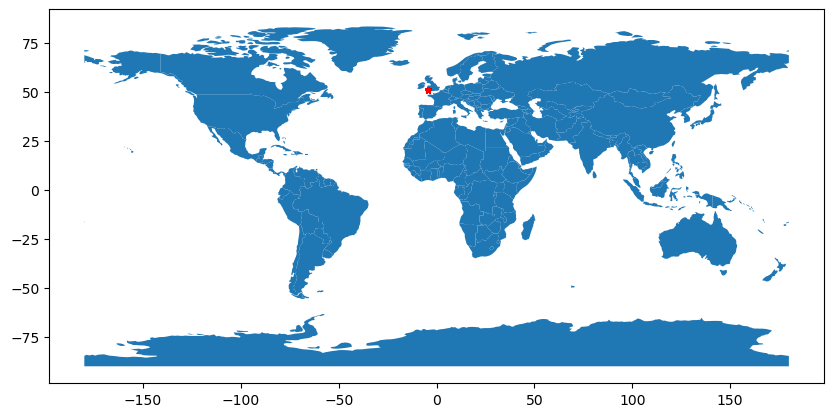

In [93]:
ax = world.plot(figsize=(10, 5))
gdf.plot(ax=ax, marker='*', color='red', markersize=16)

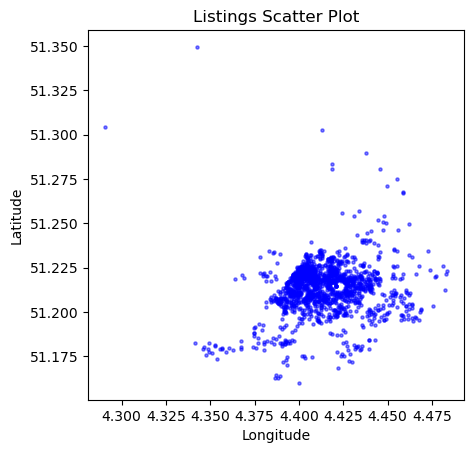

In [94]:
import geopandas as gpd
from shapely.geometry import Point


geometry = [Point(xy) for xy in zip(listings['longitude'], listings['latitude'])]
geo_df = gpd.GeoDataFrame(listings, geometry=geometry)

geo_df.plot(marker='o', color='blue', markersize=5, alpha=0.5)
plt.title('Listings Scatter Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


###### Now doing regression analysis on the dataset


###### Dropping un-necessasry columns from the dataset 

Checking the columns

In [95]:
df.columns

Index(['calender_id', 'listing_id', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights', 'Booking date', 'latitude',
       'longitude', 'property_type', 'room_type', 'accomodates', 'bedrooms',
       'beds', 'amenities', 'host_id', 'Number_of_bathrooms',
       'amenities_element_count', 'host_name', 'host_location',
       'host_since_date', 'review_id', 'reviewer_id', 'reviewer_name',
       'Review_date'],
      dtype='object')

In [96]:
df1=df.drop(df[['calender_id','latitude','longitude','host_id','review_id','reviewer_id']],axis=1)
df1

KeyboardInterrupt: 

now plotting scatter plots  and bar plots using seaborn

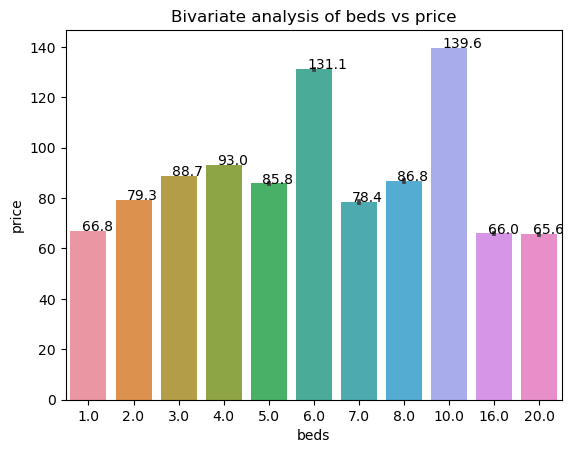

In [110]:
ax4=sns.barplot(data=df,x='beds',y='price')
for p in ax4.patches:
    ax4.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Bivariate analysis of beds vs price')
plt.show()

<Axes: xlabel='beds', ylabel='price'>

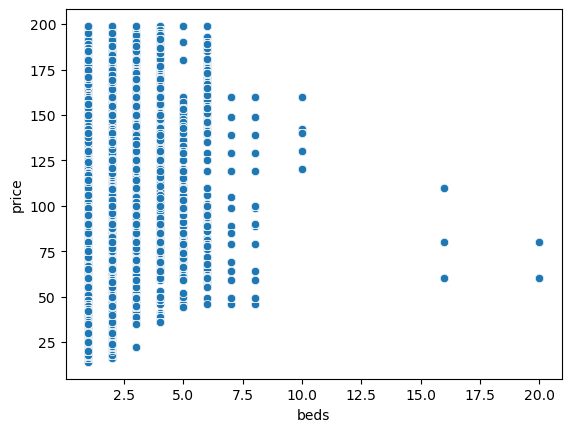

In [111]:
sns.scatterplot(data=df,x='beds',y='price')

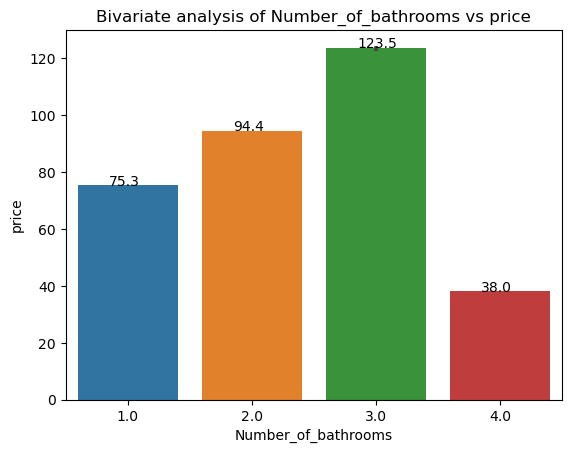

In [112]:
ax5=sns.barplot(data=df,x='Number_of_bathrooms',y='price')
for p in ax5.patches:
    ax5.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Bivariate analysis of Number_of_bathrooms vs price')
plt.show()

<Axes: xlabel='Number_of_bathrooms', ylabel='price'>

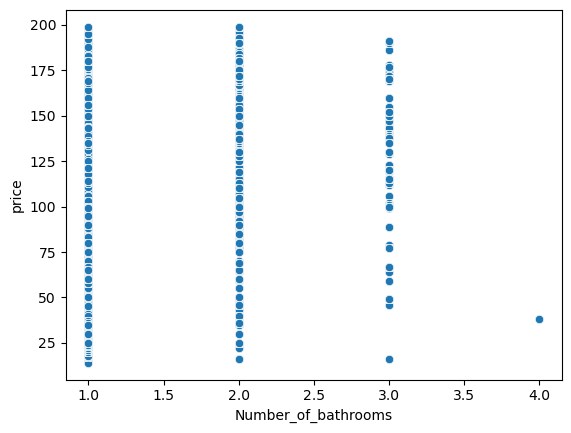

In [113]:
sns.scatterplot(data=df,x='Number_of_bathrooms',y='price')

<Axes: xlabel='amenities_element_count', ylabel='price'>

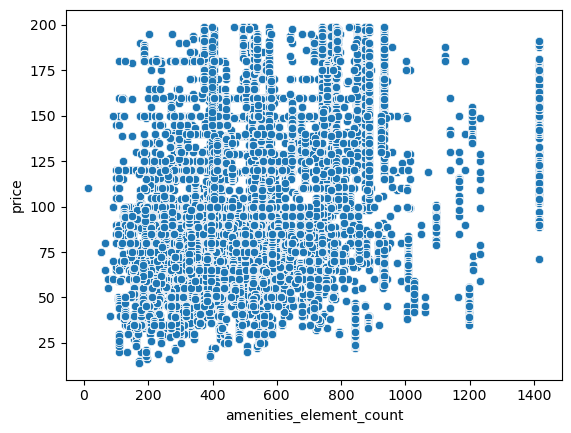

In [114]:
sns.scatterplot(x='amenities_element_count',y='price',data=df)

removing the outlier having price between 5000 to 6000.

<Axes: xlabel='amenities_element_count', ylabel='price'>

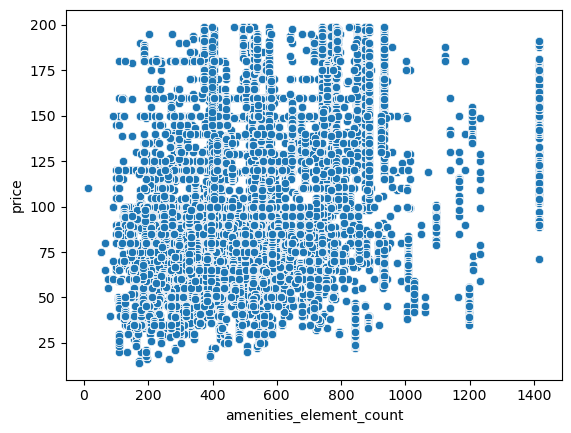

In [115]:
sns.scatterplot(x='amenities_element_count',y='price',data=df)

##### Now doing regression analysis

In [116]:
x=df['bedrooms']
y=df['price']


In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=23)

In [118]:
x_train=np.array(x_train).reshape(-1,1)
x_train

array([[2.],
       [1.],
       [1.],
       ...,
       [1.],
       [2.],
       [1.]])

In [119]:
x_test=np.array(x_test).reshape(-1,1)
x_test

array([[1.],
       [2.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
lr=LinearRegression()

In [122]:
lr.fit(x_train,y_train)

LinearRegression()

In [123]:
y_pred_train=lr.predict(x_train)
y_pred_train

array([86.68995171, 71.3607078 , 71.3607078 , ..., 71.3607078 ,
       86.68995171, 71.3607078 ])

Text(0, 0.5, 'Price')

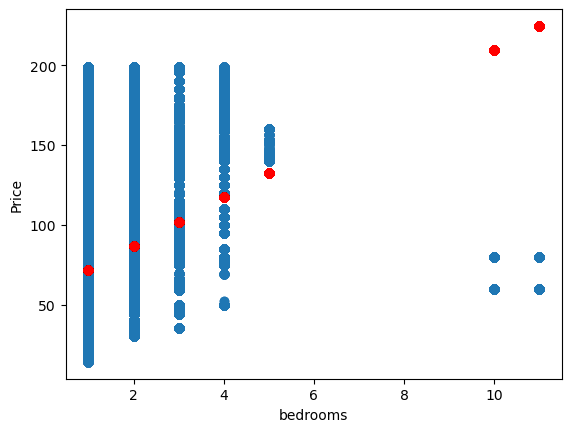

In [124]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,y_pred_train,color='red')
plt.xlabel('bedrooms')
plt.ylabel('Price')

In [125]:
y_pred_test=lr.predict(x_test)
y_pred_test

array([71.3607078 , 86.68995171, 71.3607078 , ..., 71.3607078 ,
       71.3607078 , 71.3607078 ])

Text(0, 0.5, 'Price')

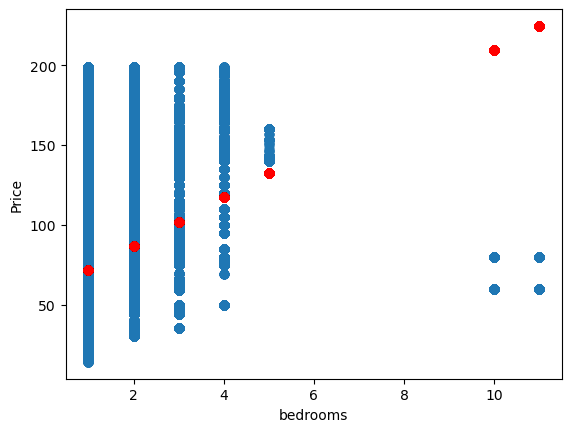

In [126]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred_test,color='red')
plt.xlabel('bedrooms')
plt.ylabel('Price')

checking score of the data

In [127]:
score= lr.score(x_test,y_test)
print(score*100,'%')

13.15912647548484 %


similarly checking for other variable and checking the accuracy score

In [128]:
x1=df['amenities_element_count']
y1=df['price']

In [129]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3, random_state=23)
x1_train=np.array(x1_train).reshape(-1,1)
x1_train

array([[456],
       [276],
       [724],
       ...,
       [283],
       [333],
       [540]], dtype=int64)

In [130]:
x1_test=np.array(x1_train).reshape(-1,1)
x1_test

array([[456],
       [276],
       [724],
       ...,
       [283],
       [333],
       [540]], dtype=int64)

In [131]:
lr.fit(x1_train,y1_train)

LinearRegression()

In [132]:
y1_pred_train=lr.predict(x1_train)
y1_pred_train

array([75.69562869, 68.49479029, 86.41687697, ..., 68.77482289,
       70.77505578, 79.05601994])

Text(0, 0.5, 'Price')

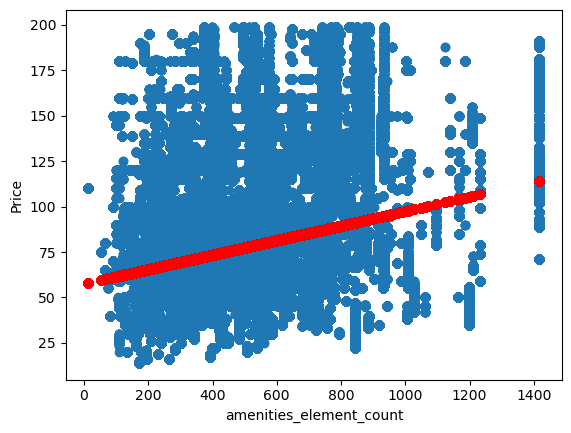

In [133]:
plt.scatter(x1_train,y1_train)
plt.scatter(x1_train,y1_pred_train,color='red')
plt.xlabel('amenities_element_count')
plt.ylabel('Price')


In [134]:
y1_pred_test = lr.predict(x1_test)
y1_pred_test

array([75.69562869, 68.49479029, 86.41687697, ..., 68.77482289,
       70.77505578, 79.05601994])

Text(0, 0.5, 'price')

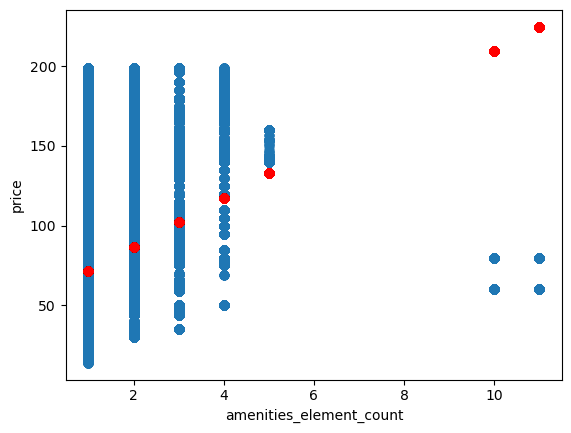

In [135]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred_test,color='red')
plt.xlabel('amenities_element_count')
plt.ylabel('price')

In [136]:
score= lr.score(x_test,y1_test)
print(score*100,'%')

-32.9507198251493 %


now applying regression on number of bathrooms and price

In [137]:
x2=df['Number_of_bathrooms']
y2=df['price']

In [138]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=23)

In [139]:
x2_train=np.array(x2_train).reshape(-1,1)
x2_train

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [2.],
       [1.]])

Experimental_Data_Anaysis

In [140]:
x2_test=np.array(x2_test).reshape(-1,1)
x2_test

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [141]:
lr.fit(x2_train,y2_train)


LinearRegression()

In [142]:
y2_pred_train=lr.predict(x2_train)
y2_pred_train

array([75.39227349, 75.39227349, 75.39227349, ..., 75.39227349,
       93.99969922, 75.39227349])

Text(0, 0.5, 'Price')

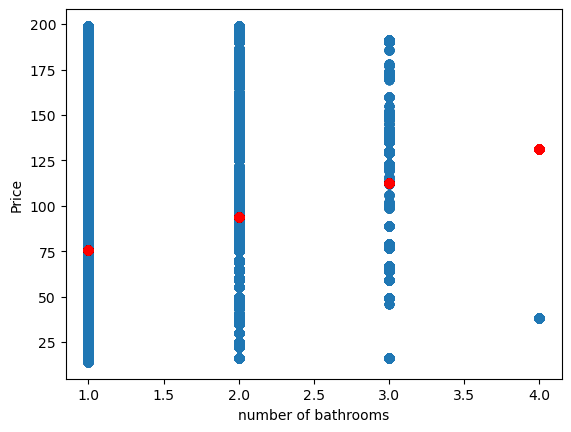

In [143]:
plt.scatter(x2_train,y2_train)
plt.scatter(x2_train,y2_pred_train,color='red')
plt.xlabel('number of bathrooms')
plt.ylabel('Price')


In [144]:
y2_pred_test=lr.predict(x2_test)
y2_pred_test

array([75.39227349, 75.39227349, 75.39227349, ..., 75.39227349,
       75.39227349, 75.39227349])

Text(0, 0.5, 'Price')

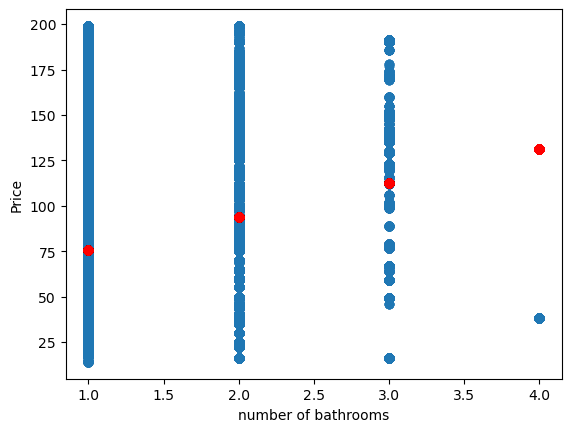

In [145]:
plt.scatter(x2_test,y2_test)
plt.scatter(x2_test,y2_pred_test,color='red')
plt.xlabel('number of bathrooms')
plt.ylabel('Price')

In [146]:
score=lr.score(x2_test,y2_test)
print(score*100,'%')

2.983778943747395 %


As observed from the linear regression we are not able to predict the price properly as the R2 score is too low.

Now doing decision tree regression on the data 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)

regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


In [ ]:
# Initialize geolocator
geolocator = Nominatim(user_agent="Airbnb_Data")

# Function to reverse geocode coordinates and get address
def get_address(row):
    location = geolocator.reverse((row['latitude'], row['longitude']))
    return location.address

# Apply the function to each row to get the address
df['address'] = df.apply(get_address, axis=1)